In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.fft import fft, fftfreq, fftshift

In [2]:
def V_p(x):

    return np.zeros(len(x)) # Voor infinite square well

In [3]:
def Schroedinger(x, dx):

    main = 1/(dx**2) + V_p(x)[1:-1]
    off = -1/(2*dx**2) * np.ones(len(main)-1) # lengte van de nevendiagonalen = lengte van hoofd - 1

    E, psi = eigh_tridiagonal(main, off) # psi word uitgegeven als een matrix waarbij elke kolomn een eigenvector is.

    return E, psi.T # psi wordt dmv psi.T getransponeerd, zodat elke vector 1 rij wordt.
                    # dit hoef je niet te doen maar ik vind het makkelijker met de syntex voor het plotten

In [4]:
class Wave_packet:

    def __init__(self, N, dt, sigma0=5.0, k0=1.0, x0=-150.0, x_begin=-200.0,
                x_end=200.0, barrier_height=1.0, barrier_width=3.0):
        
        self.N = N
        self.dt = dt
        self.sigma0 = sigma0
        self.k0 = k0
        self.x0 = x0
        self.x_begin = x_begin
        self.x_end = x_end
        self.barrier_height = barrier_height
        self.barrier_width = barrier_width

        self.x, self.dx = np.linspace(self.x_begin, self.x_end, self.N, retstep=True)

        norm = (2.0 * np.pi * self.sigma0**2)**(-0.25)

        self.psi = norm * np.exp(-(self.x - self.x0)**2 / (4.0 * self.sigma0**2))*np.exp(1.0j * self.k0 * self.x)

In [5]:
sigma = [0.1, 1, 10, 20, 100]

In [6]:
k = fftfreq(500, 1/0.5)
k = fftshift(k)
packets = []
psi_ks = []
for i in sigma:
    packet = Wave_packet(sigma0 = i, N=500, dt=0.5, x0 = 0, k0=2, barrier_width=1, barrier_height = 10)
    packets.append(packet)

    psi_k = fft(packet.psi)
    psi_k = fftshift(psi_k)
    psi_ks.append(psi_k)
    


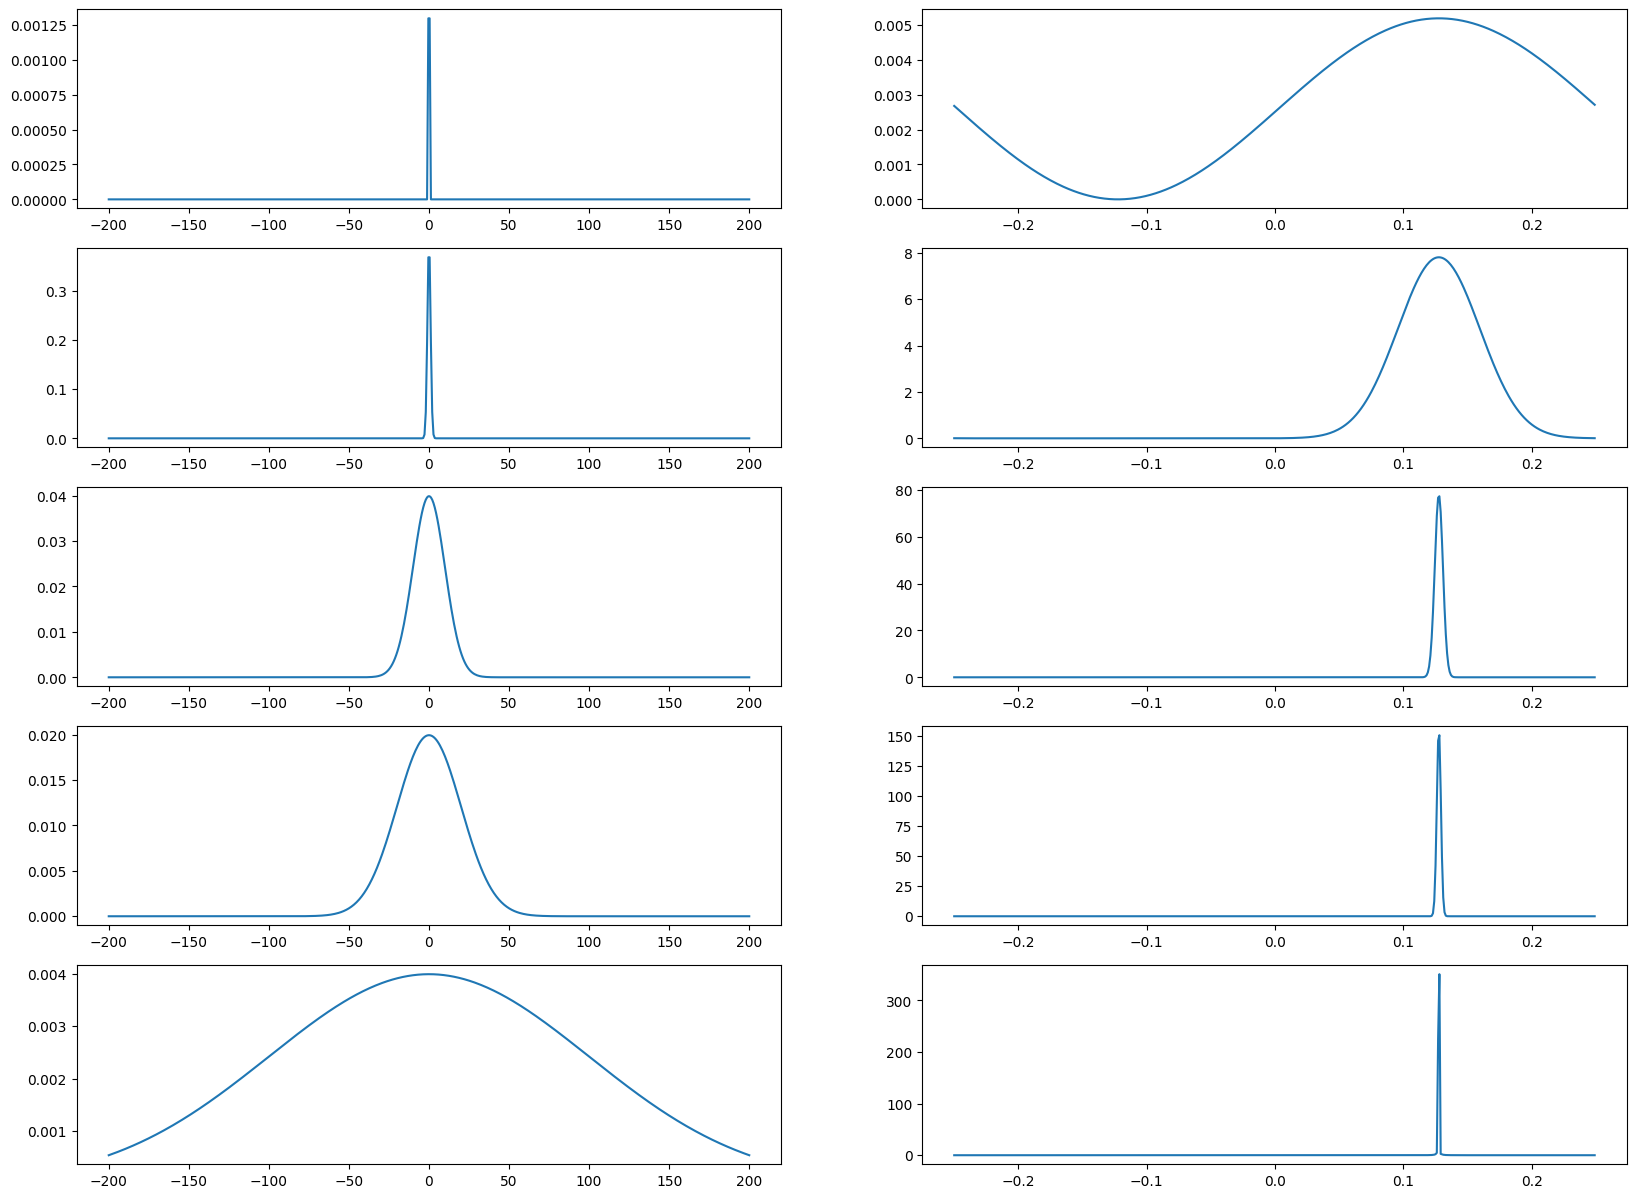

In [8]:
fig, ax = plt.subplots(5,2, figsize=(20, 15))

for i in range(5):
    plt.subplot(5,2,2*i+1)
    plt.plot(packets[i].x, np.abs(packets[i].psi)**2)

    plt.subplot(5,2,2*i+2)
    plt.plot(k, np.abs(psi_ks[i])**2)

plt.show()